# MSFT Exploratory Data Analysis
-Bhushan Dhamankar

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import time

In [2]:
# Reading Dataset
data=pd.read_csv("MSFT.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061751,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063956,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.065059,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063405,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.062302,47894400


In [3]:
# creating Target Column
data['Target']=np.where(data['Open']-data['Close']<0,'up','down')

In [4]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Target
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061751,1031788800,up
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063956,308160000,up
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.065059,133171200,up
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063405,67766400,down
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.062302,47894400,down


### Features:-
    1) Date
    2) Open
    3) High
    4) Low
    5) Close
    6) Adj Close
    7) Vloume
    8) Target

In [6]:
data.shape

(8857, 8)

In [7]:
# checking Null Values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8857 entries, 0 to 8856
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8857 non-null   object 
 1   Open       8857 non-null   float64
 2   High       8857 non-null   float64
 3   Low        8857 non-null   float64
 4   Close      8857 non-null   float64
 5   Adj Close  8857 non-null   float64
 6   Volume     8857 non-null   int64  
 7   Target     8857 non-null   object 
dtypes: float64(5), int64(1), object(2)
memory usage: 553.7+ KB


OBSERVATION : No Null Values

In [8]:
# Continuous Numerical Features
num_features=[feature for feature in data.columns if data[feature].dtypes!='O']
num_features

['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

### 1) Date Feature

In [24]:
# Checking Data Type
data['Date'].dtype

dtype('<M8[ns]')

In [25]:
data['Date']=pd.to_datetime(data['Date'])

In [26]:
data['Month']=data['Date'].dt.month
data['Year']=data['Date'].dt.year
data['Day']=data['Date'].dt.day

In [27]:
data.head()

,Date,Year,Month,Day,Open,High,Low,Close,Adj Close,Volume,Target
0,1986-03-13,1986,3,13,0.088542,0.101563,0.088542,0.097222,0.061751,1031788800,up
1,1986-03-14,1986,3,14,0.097222,0.102431,0.097222,0.100694,0.063956,308160000,up
2,1986-03-17,1986,3,17,0.100694,0.103299,0.100694,0.102431,0.065059,133171200,up
3,1986-03-18,1986,3,18,0.102431,0.103299,0.098958,0.099826,0.063405,67766400,down
4,1986-03-19,1986,3,19,0.099826,0.100694,0.097222,0.098090,0.062302,47894400,down


In [28]:
data=data[['Date','Year','Month', 'Day','Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Target']]

In [29]:
data.head()

,Date,Year,Month,Day,Open,High,Low,Close,Adj Close,Volume,Target
0,1986-03-13,1986,3,13,0.088542,0.101563,0.088542,0.097222,0.061751,1031788800,up
1,1986-03-14,1986,3,14,0.097222,0.102431,0.097222,0.100694,0.063956,308160000,up
2,1986-03-17,1986,3,17,0.100694,0.103299,0.100694,0.102431,0.065059,133171200,up
3,1986-03-18,1986,3,18,0.102431,0.103299,0.098958,0.099826,0.063405,67766400,down
4,1986-03-19,1986,3,19,0.099826,0.100694,0.097222,0.098090,0.062302,47894400,down


In [30]:
data['Month'].unique()

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2], dtype=int64)

In [31]:
data['Year'].unique()

array([1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996,
       1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2020, 2021], dtype=int64)

### 3) Target 

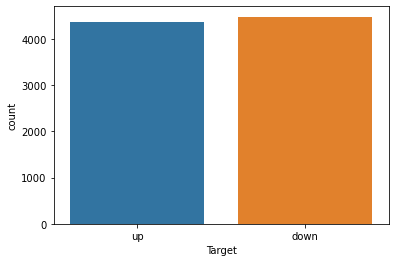

In [32]:
# Checking for Imbalanced Dataset
sns.countplot(data['Target'])

OBSERVATION : We have almost Balanced Dataset

### 2) Continuous  Numerical Feature

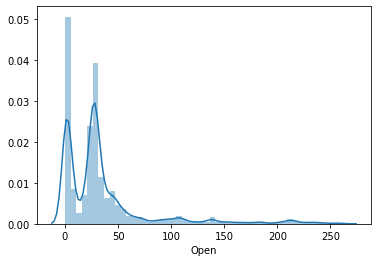

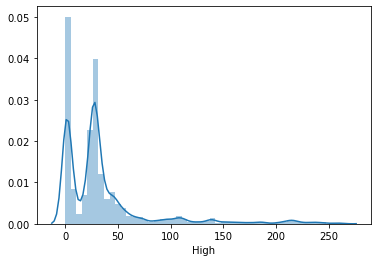

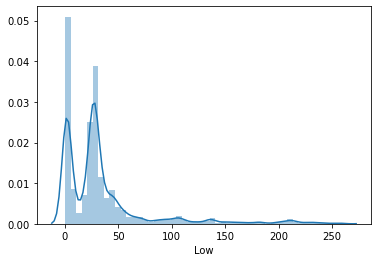

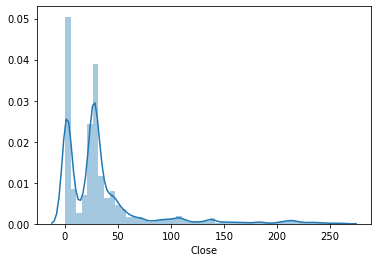

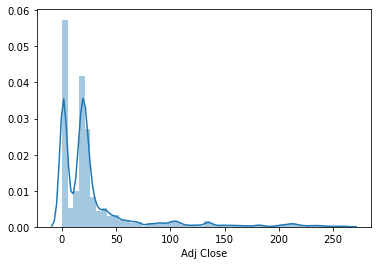

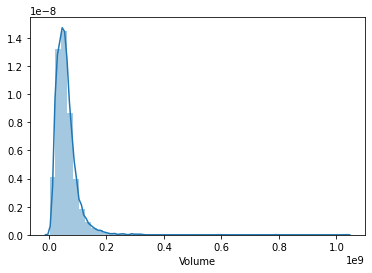

In [33]:
# Distribution
for feature in num_features:
    df=data.copy()
    sns.distplot(df[feature])
    plt.show()

OBSERVATION : The Distribution of the Numerical Variables is not Normal and are almost same

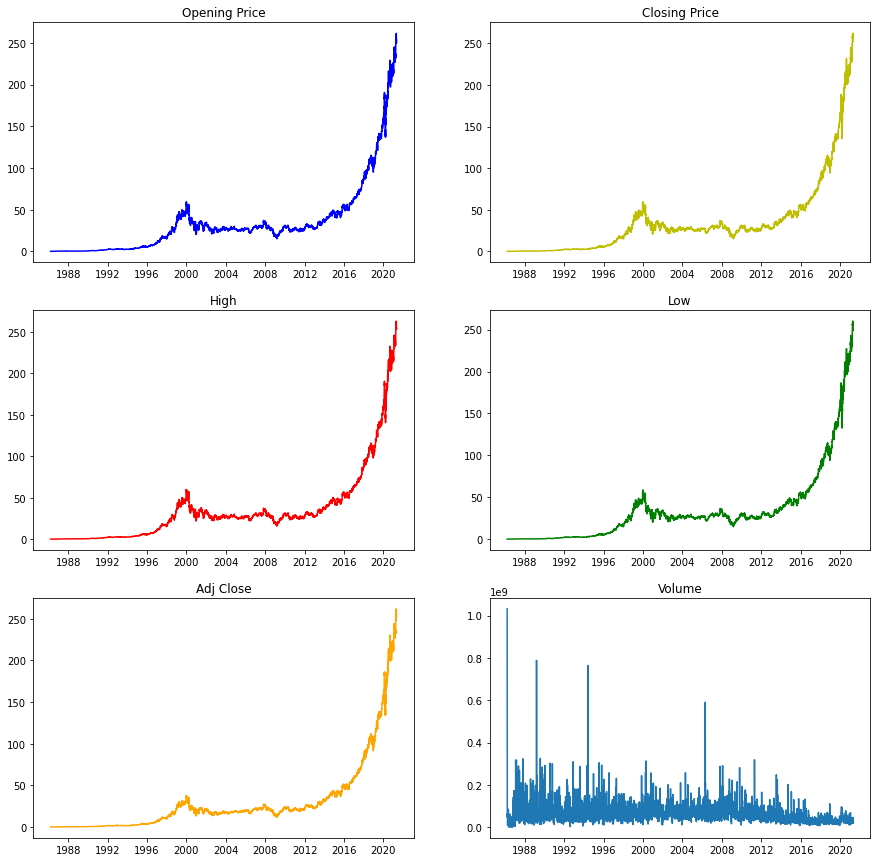

In [34]:
figure, axis = plt.subplots(3, 2,figsize=(15,15))
    
# For Opening Price
axis[0, 0].plot(data['Date'],data['Open'],color='b')
axis[0, 0].set_title("Opening Price")
  
# For Closing Price
axis[0, 1].plot(data['Date'],data['Close'],color='y')
axis[0, 1].set_title("Closing Price")
  
# For High
axis[1, 0].plot(data['Date'],data['High'],color='r')
axis[1, 0].set_title("High")
  
# For Low
axis[1, 1].plot(data['Date'],data['Low'],color='g')
axis[1, 1].set_title("Low")

# For Adj Close
axis[2, 0].plot(data['Date'],data['Adj Close'],color='orange')
axis[2, 0].set_title("Adj Close")
  
# For Volume
axis[2, 1].plot(data['Date'],data['Volume'])
axis[2, 1].set_title("Volume")
  
# Combine all the operations and display
plt.show()

OBSERVATION : <br>
    1) Prices are increasing with time<br>
    2) Volume is decreasing with time

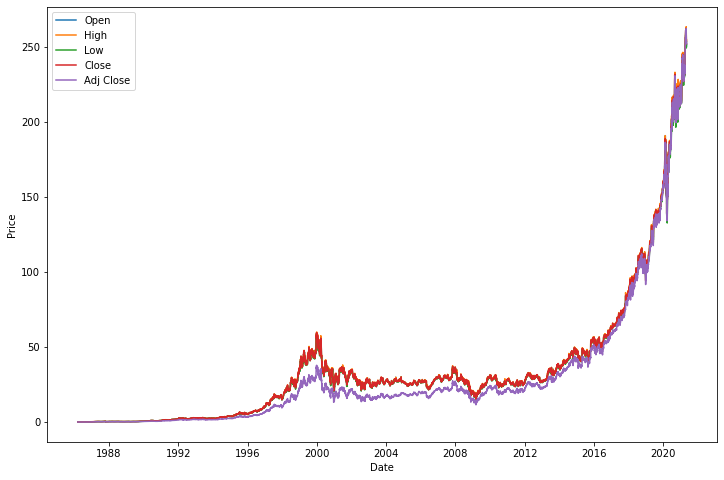

In [35]:
# Lineplot of Numerical Features(Opening Price, High, Low, Closing Price) for Year
plt.figure(figsize =[12,8])
features=['Open', 'High', 'Low', 'Close', 'Adj Close']
for i in features:
    sns.lineplot(y=df[i],x=df['Date'],label=i)
    plt.ylabel('Price')
    plt.legend()

OBSERVATION :<br>
    1) above plot shows the variation of prices w.r.t Date<br>
    2) Adj Closing Price is lesser than other Prices

In [36]:
# Copy Dataset
df=data.copy()

In [37]:
# Deriving Difference in Opening and Closing Prices in percentage
df['Diff%']=((data['Close']-data['Open'])/data['Open'])*100

In [46]:
df.head()

,Date,Year,Month,Day,Open,High,Low,Close,Adj Close,Volume,Target,Diff%
0,1986-03-13,1986,3,13,0.088542,0.101563,0.088542,0.097222,0.061751,1031788800,up,9.803258
1,1986-03-14,1986,3,14,0.097222,0.102431,0.097222,0.100694,0.063956,308160000,up,3.571209
2,1986-03-17,1986,3,17,0.100694,0.103299,0.100694,0.102431,0.065059,133171200,up,1.725027
3,1986-03-18,1986,3,18,0.102431,0.103299,0.098958,0.099826,0.063405,67766400,down,-2.543174
4,1986-03-19,1986,3,19,0.099826,0.100694,0.097222,0.098090,0.062302,47894400,down,-1.739026


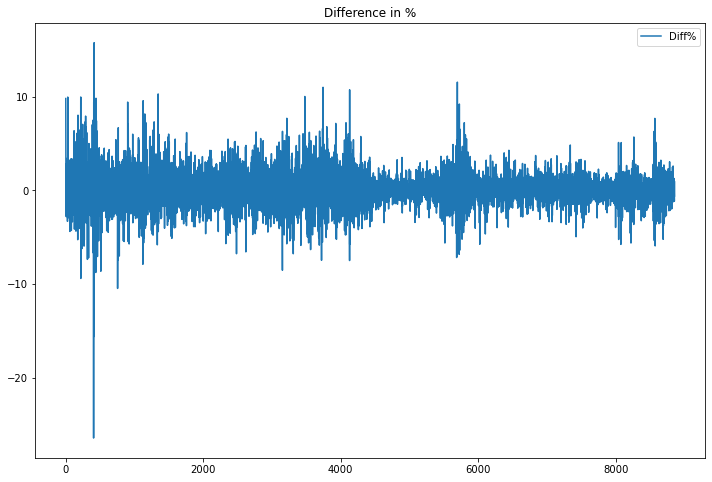

In [47]:
# Plotting Difference
df['Diff%'].plot(figsize = (12,8), title = 'Difference in %')
plt.legend(loc = 'best');

OBSERVATION : <br>
1) from above we can say that most of the time the percent of Increase and Decrease in Opening_Price is 6%<br>
2) Highest Increase in Opening_Price (UP) is 15.75%<br>
3) Highest Decrease is Opening_Price (DOWN) is 26.4%<br>


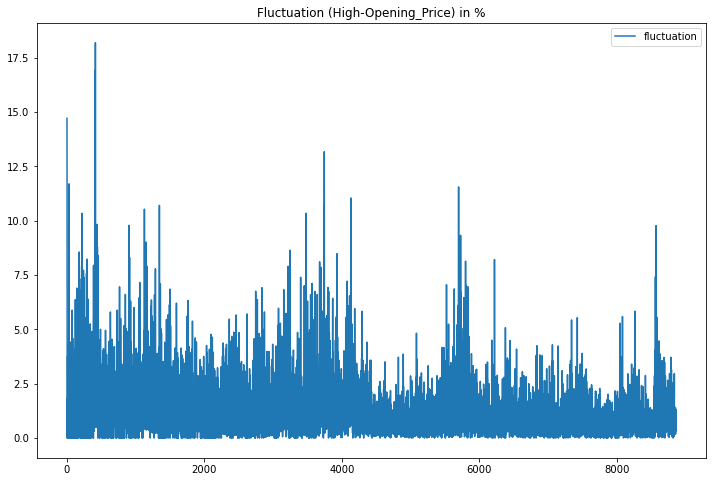

In [48]:
# Deriving Difference in High and Opening_Price in percentage
df['fluctuation']=((data['High']-data['Open'])/data['Open'])*100
df['fluctuation'].plot(figsize = (12,8), title = 'Fluctuation (High-Opening_Price) in %')
plt.legend(loc = 'best');

OBSERVATION : Highest Peak is 18.18%

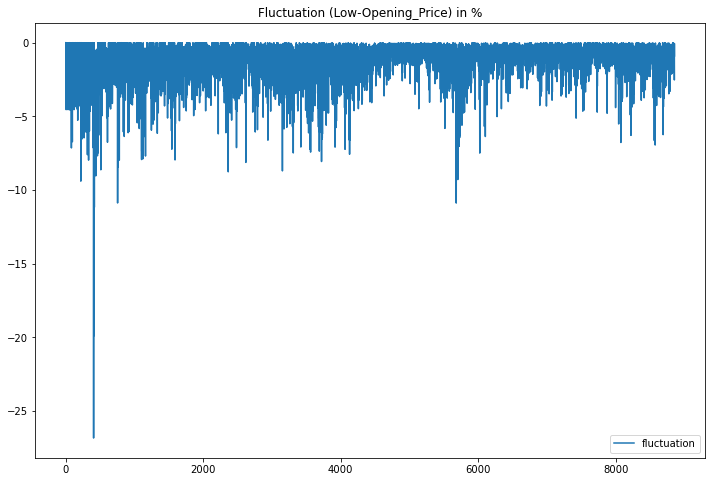

In [49]:
# Deriving Difference in High and Low in percentage
df['fluctuation']=((data['Low']-data['Open'])/data['Open'])*100
df['fluctuation'].plot(figsize = (12,8), title = 'Fluctuation (Low-Opening_Price) in %')
plt.legend(loc = 'best');

OBSERVATION : Lowest Drop is 26.82%

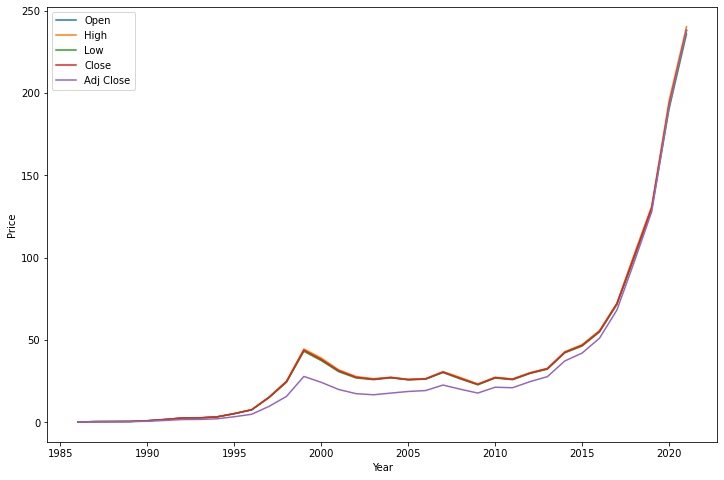

In [50]:
# Lineplot of Numerical Features(Opening Price, High, Low, Closing Price) for Year
plt.figure(figsize =[12,8])
for i in features:
    sns.lineplot(df['Year'],df[i],err_style=None,label=i)
    plt.ylabel('Price')
    plt.legend()

OBSERVATION : <br>
    1) The Average Difference between Closing Price and Adj Price is 5 (max=21 , min=0)<br>
    2) Stock Prices kept increasing till 2000, then dropped till 2010 and again started Increasing

In [51]:
df.head()

,Date,Year,Month,Day,Open,High,Low,Close,Adj Close,Volume,Target,Diff%,fluctuation
0,1986-03-13,1986,3,13,0.088542,0.101563,0.088542,0.097222,0.061751,1031788800,up,9.803258,0.000000
1,1986-03-14,1986,3,14,0.097222,0.102431,0.097222,0.100694,0.063956,308160000,up,3.571209,0.000000
2,1986-03-17,1986,3,17,0.100694,0.103299,0.100694,0.102431,0.065059,133171200,up,1.725027,0.000000
3,1986-03-18,1986,3,18,0.102431,0.103299,0.098958,0.099826,0.063405,67766400,down,-2.543174,-3.390574
4,1986-03-19,1986,3,19,0.099826,0.100694,0.097222,0.098090,0.062302,47894400,down,-1.739026,-2.608539


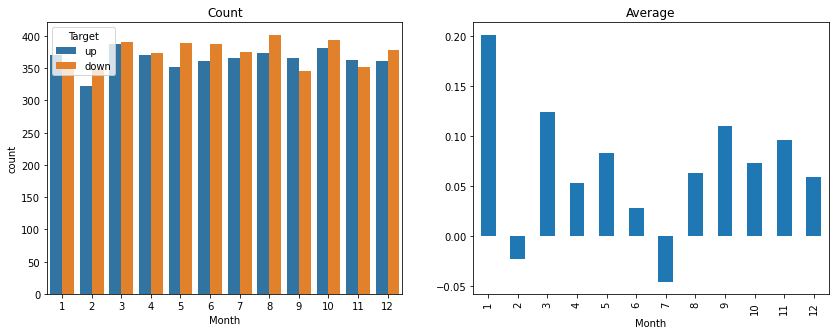

In [54]:
# Checking for Imbalanced Dataset for each month
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.countplot(data['Month'],hue=data['Target'])
plt.title("Count")
plt.subplot(1,2,2)
df.groupby('Month')['Diff%'].mean().plot.bar()
plt.title("Average")
plt.show()

OBSERVATION : For most of the months the no. of DOWNs are more than no. of UPs

### Observations:
1) No Null Values<br>
2) We have almost Balanced Dataset<br>
3) The Distribution of the Numerical Variables is not Normal and are almost same<br>
4) Prices are increasing with time<br>
5) Volume is decreasing with time<br>
6) above plot shows the variation of prices w.r.t Date<br>
7) Adj Closing Price is lesser than other Prices<br>
8) from above we can say that most of the time the percent of Increase and Decrease in Opening_Price is 6%<br>
9) Highest Increase in Opening_Price (UP) is 15.75%<br>
10) Highest Decrease is Opening_Price (DOWN) is 26.4%<br>
11) Highest Peak is 18.18%<br>
12) Lowest Drop is 26.82%<br>
13) The Average Difference between Closing Price and Adj Price is 5 (max=21 , min=0)<br>
14) Stock Prices kept increasing till 2000, then dropped till 2010 and again started Increasing<br>
15) For most of the months the no. of DOWNs are more than no. of UPs<br>